In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pprint import pprint
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold
#from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, recall_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, average_precision_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
%matplotlib inline

In [2]:
df = pd.read_excel (r'project3_data.xlsx')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df2 = df.copy()

In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
target_counts = df.target.value_counts()

In [10]:
print('Class 0:', target_counts[0])
print('Class 1:', target_counts[1])
print('Proportion:', round(target_counts[0] / target_counts[1], 2), ': 1')

Class 0: 138
Class 1: 165
Proportion: 0.84 : 1


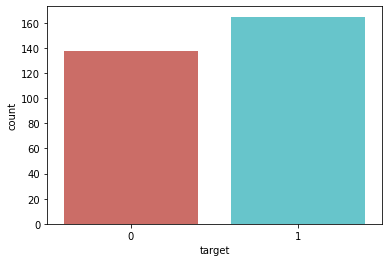

In [11]:
sns.countplot(x='target', data = df, palette = 'hls')
plt.show()
# sns.histplot(x='target',data=df)

In [18]:
print(df.apply(lambda col: col.unique()))

age         [63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 5...
sex                                                    [1, 0]
cp                                               [3, 2, 1, 0]
trestbps    [145, 130, 120, 140, 172, 150, 110, 135, 160, ...
chol        [233, 250, 204, 236, 354, 192, 294, 263, 199, ...
fbs                                                    [1, 0]
restecg                                             [0, 1, 2]
thalach     [150, 187, 172, 178, 163, 148, 153, 173, 162, ...
exang                                                  [0, 1]
oldpeak     [2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, ...
slope                                               [0, 2, 1]
ca                                            [0, 2, 1, 3, 4]
thal                                             [1, 2, 3, 0]
target                                                 [1, 0]
dtype: object


In [18]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


<AxesSubplot:>

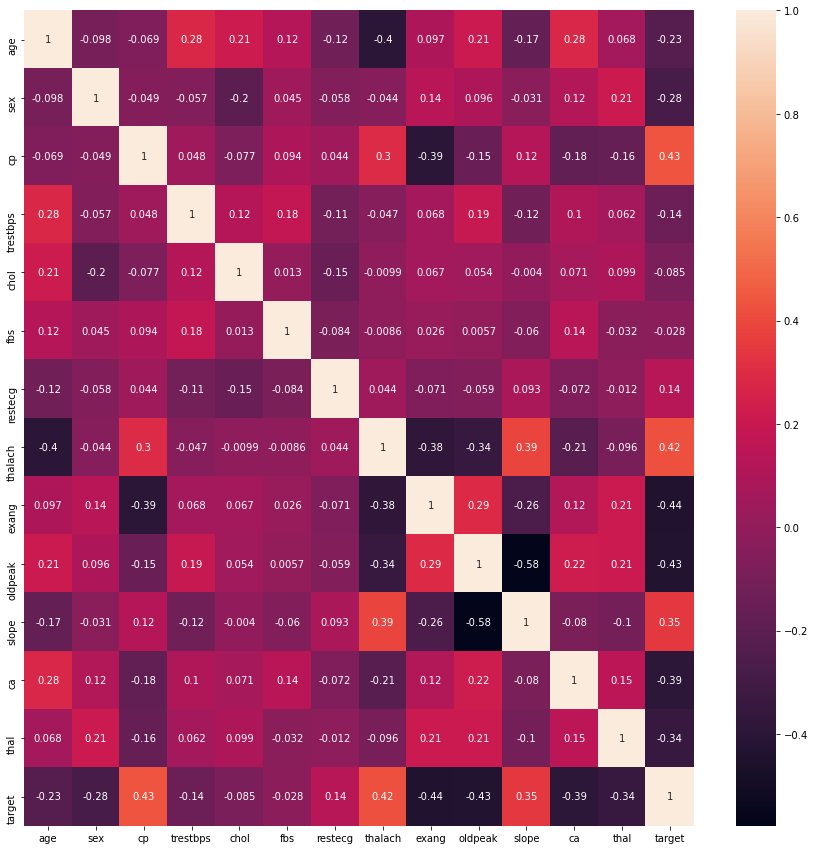

In [21]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,ax=ax)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

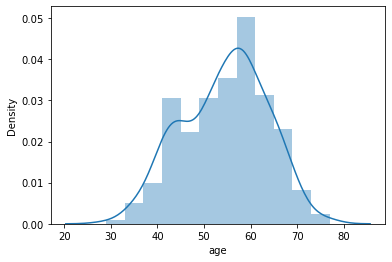

In [22]:
sns.distplot(df.age)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


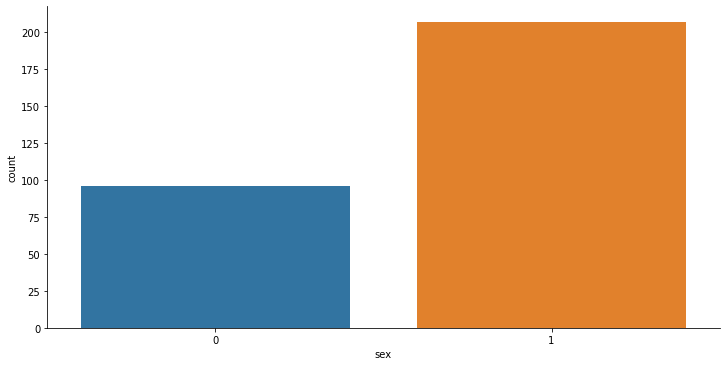

In [23]:
# There are significantly more men in the data than women
sns.factorplot('sex', data = df, kind = 'count', aspect = 2.0)

<AxesSubplot:xlabel='sex', ylabel='age'>

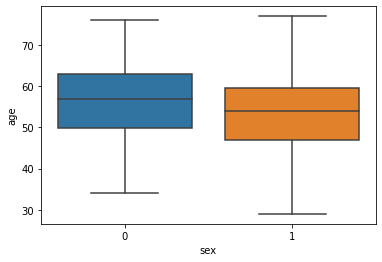

In [24]:
# A box plot to show the ranges of ages of the women and men in the data
sns.boxplot(data = df, x = 'sex', y = 'age')

In [23]:
hist_df = df.groupby('target')

In [24]:
hist_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


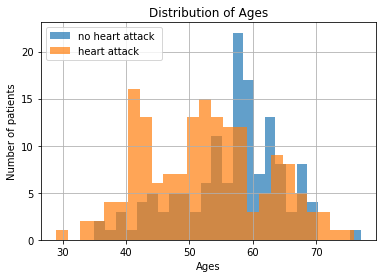

In [25]:
# 2. A distribution of the ages of patients that suffered a heart attack and the ones that didn't
hist_df['age'].hist(bins=25, alpha=0.7)
plt.title('Distribution of Ages')
plt.xlabel('Ages')
plt.ylabel('Number of patients')
plt.legend(('no heart attack ', 'heart attack'), loc = 'upper left')
plt.show()

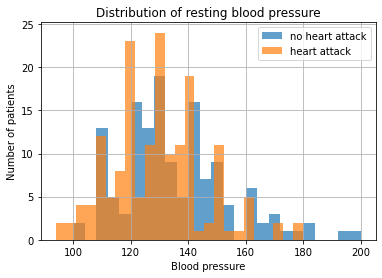

In [26]:
# 3
hist_df['trestbps'].hist(bins=25, alpha=0.7)
plt.title('Distribution of resting blood pressure')
plt.xlabel('Blood pressure')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

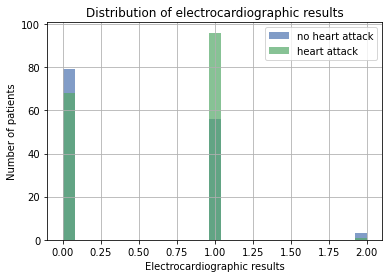

In [44]:
hist_df['restecg'].hist(bins = 25, alpha = 0.7)
plt.title('Distribution of electrocardiographic results')
plt.xlabel('Electrocardiographic results')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

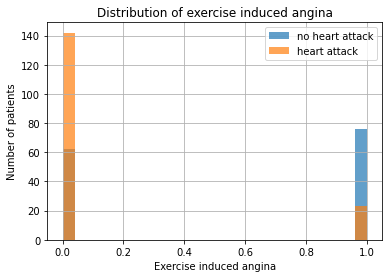

In [27]:
hist_df['exang'].hist(bins = 25, alpha = 0.7)
plt.title('Distribution of exercise induced angina')
plt.xlabel('Exercise induced angina')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

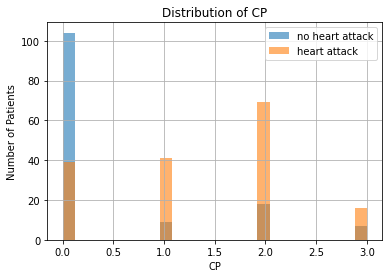

In [31]:
hist_df['cp'].hist(bins = 25, alpha=0.6)
plt.title('Distribution of CP')
plt.xlabel('CP')
plt.ylabel('Number of Patients')
plt.legend(('no heart attack', 'heart attack'))
plt.show()

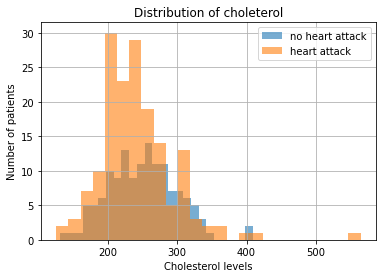

In [32]:
hist_df['chol'].hist(bins = 25, alpha=0.6)
plt.title('Distribution of choleterol')
plt.xlabel('Cholesterol levels')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

In [51]:
def get_gender(sex_value):
    
    gender_string = 'Male'
    
    if sex_value == 0:
        gender_string = 'Female'
    return gender_string

def get_cp_category(cp_value):
    
    if cp_value == 0:
        cp_string = 'typical'
    elif cp_value == 1:
        cp_string = 'atypical'
    elif cp_value == 2:
        cp_string = 'non_anginal'
    elif cp_value == 3:
        cp_string = 'asmptomatic'
    
    return(cp_string)

In [52]:
subset_df = df[['sex', 'cp']]

In [53]:
subset_df.head()

,sex,cp
0,1,3
1,1,2
2,0,1
3,1,1
4,0,0


In [54]:
subset_df['sex'] = subset_df.sex.map(lambda x: get_gender(x))
subset_df['cp'] = subset_df.cp.map(lambda x: get_cp_category(x))

<ipython-input-54-7af9cdc90cd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['sex'] = subset_df.sex.map(lambda x: get_gender(x))
<ipython-input-54-7af9cdc90cd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cp'] = subset_df.cp.map(lambda x: get_cp_category(x))


In [55]:
subset_df.head()

,sex,cp
0,Male,asmptomatic
1,Male,non_anginal
2,Female,atypical
3,Male,atypical
4,Female,typical


In [56]:
dum_df = pd.get_dummies(subset_df[['sex', 'cp']])

In [57]:
dum_df.head()

,sex_Female,sex_Male,cp_asmptomatic,cp_atypical,cp_non_anginal,cp_typical
0,0,1,1,0,0,0
1,0,1,0,0,1,0
2,1,0,0,1,0,0
3,0,1,0,1,0,0
4,1,0,0,0,0,1


In [60]:
dum_df = dum_df.drop(['sex_Female'], axis = 1)

In [61]:
dum_df.rename(columns = {'sex_Male': 'Male'}, inplace = True)

In [62]:
df = pd.concat([df, dum_df], axis = 1)

In [63]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Male,cp_asmptomatic,cp_atypical,cp_non_anginal,cp_typical
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,0,0,1


In [64]:
df = df.drop(['sex', 'cp'], axis = 1)

In [65]:
df.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target', 'Male', 'cp_asmptomatic',
       'cp_atypical', 'cp_non_anginal', 'cp_typical'],
      dtype='object')

In [66]:
df = df[['age', 'Male', 'cp_asmptomatic','cp_atypical', 'cp_non_anginal', 'cp_typical', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target']]

In [67]:
df.columns

Index(['age', 'Male', 'cp_asmptomatic', 'cp_atypical', 'cp_non_anginal',
       'cp_typical', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

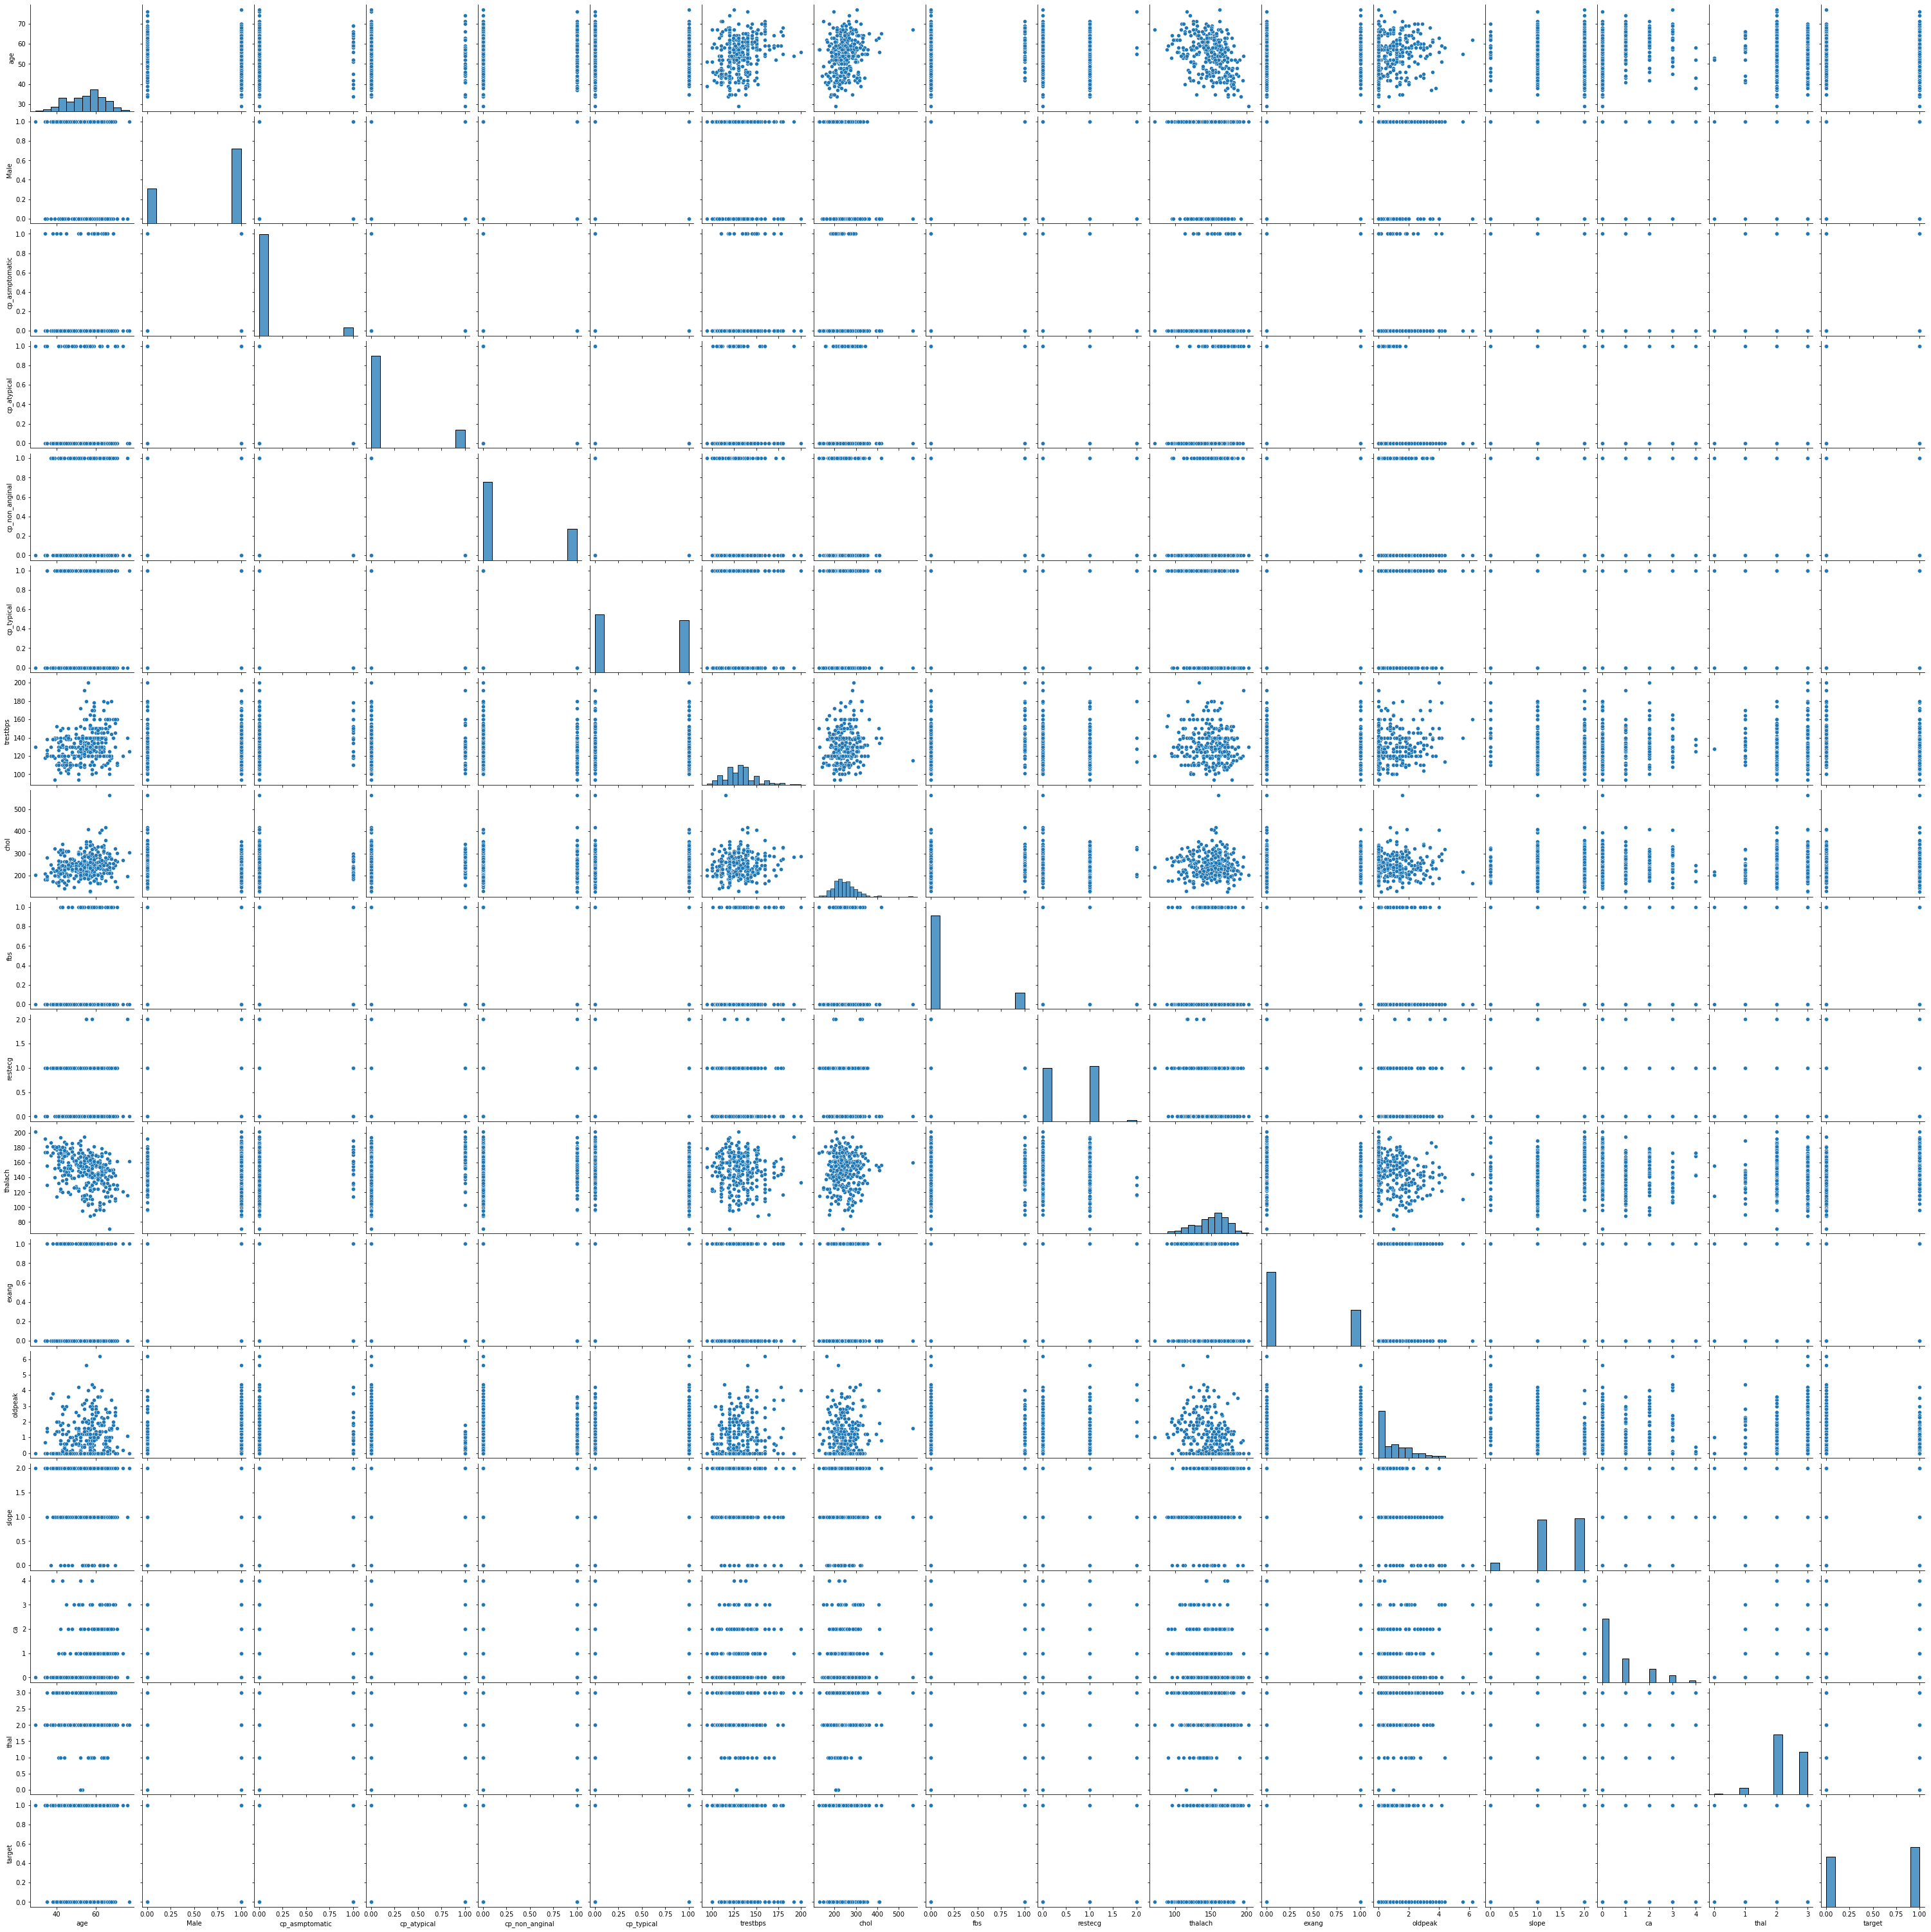

In [76]:
sns.pairplot(df)

In [70]:
X = df.iloc[:, :-1].values

In [72]:
X

array([[63.,  1.,  1., ...,  0.,  0.,  1.],
       [37.,  1.,  0., ...,  0.,  0.,  2.],
       [41.,  0.,  0., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  0., ...,  1.,  1.,  2.]])

In [74]:
Y = df.iloc[:, 16].values

In [75]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=4)

In [78]:
logistic_model = LogisticRegression()

In [79]:
logistic_model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
logistic_predictions = logistic_model.predict(X_test)

In [81]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, logistic_predictions)
cnf_matrix

array([[29,  9],
       [ 8, 45]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

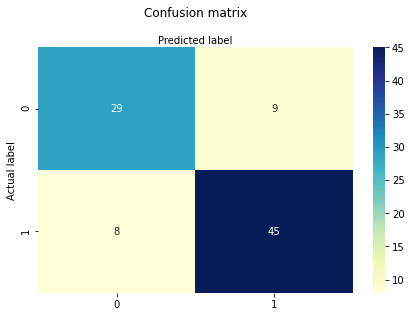

In [82]:
# cm = confusion_matrix(y_valid, y_pred)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix, annot = True,cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [83]:
print("Accuracy:",metrics.accuracy_score(y_test, logistic_predictions))
print("Precision:",metrics.precision_score(y_test, logistic_predictions))
print("Recall:",metrics.recall_score(y_test, logistic_predictions))

Accuracy: 0.8131868131868132
Precision: 0.8333333333333334
Recall: 0.8490566037735849
